<a href="https://colab.research.google.com/github/vivekpenuli/healthcare/blob/main/final_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import keras

#import the required libraries and methods
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
ImgSize = [224, 224]
#To get the location of "malaria detection cell images" dataset in the drive
train_path = '/content/drive/MyDrive/Brain_tumor/brain_tumor_train'
test_path = '/content/drive/MyDrive/Brain_tumor/brain_tumor_test'

In [4]:
vgg = VGG16(input_shape=ImgSize + [3], weights='imagenet', include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('/content/drive/MyDrive/Brain_tumor/brain_tumor_train/*')
print(folders)

['/content/drive/MyDrive/Brain_tumor/brain_tumor_train/no', '/content/drive/MyDrive/Brain_tumor/brain_tumor_train/yes']


In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             horizontal_flip=True,
                             height_shift_range=0.1,
                             width_shift_range=0.1,
                             shear_range=0.1,
                             brightness_range=[0.3, 1.5])

In [13]:

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Brain_tumor/brain_tumor_train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 196 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Brain_tumor/brain_tumor_test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 49 images belonging to 2 classes.


In [16]:
m = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 2.4216 - accuracy: 0.5419 - val_loss: 2.7181 - val_accuracy: 0.6327
Epoch 2/10
7/7 [==============================] - 4s 494ms/step - loss: 2.2554 - accuracy: 0.6209 - val_loss: 1.6955 - val_accuracy: 0.4286
Epoch 3/10
7/7 [==============================] - 4s 497ms/step - loss: 0.7977 - accuracy: 0.6133 - val_loss: 0.6944 - val_accuracy: 0.7755
Epoch 4/10
7/7 [==============================] - 4s 494ms/step - loss: 0.7990 - accuracy: 0.7839 - val_loss: 0.7866 - val_accuracy: 0.7755
Epoch 5/10
7/7 [==============================] - 4s 580ms/step - loss: 0.5147 - accuracy: 0.8199 - val_loss: 0.3784 - val_accuracy: 0.8163
Epoch 6/10
7/7 [==============================] - 4s 491ms/step - loss: 0.4492 - accuracy: 0.8208 - val_loss: 0.3975 - val_accuracy: 0.7755
Epoch 7/10
7/7 [==============================] - 4s 504ms/step - loss: 0.3643 - accuracy: 0.8496 - val_loss: 0.3457 - val_accuracy: 0.8163
Epoch 8/10
7/7 [======

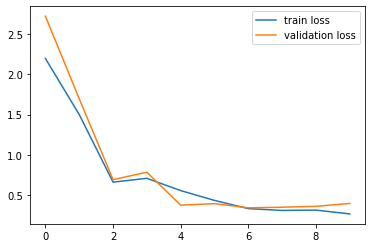

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss 
plt.plot(m.history['loss'], label='train loss')
plt.plot(m.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

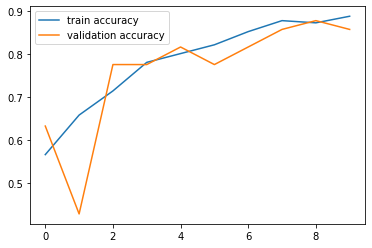

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the accuracy
plt.plot(m.history['accuracy'], label='train accuracy')
plt.plot(m.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
model.save('finalmri.h5')